# Étude de marché 🐔 ✈️

## Librairies & fonctions

In [1]:
pip install pca

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn as sk
import scipy as sp
import pca as pca

In [3]:
#Création de fonctions
def doublons(df): # Nombre de doublons dans la dataframe
    print(len(df) - len(df.drop_duplicates()), 'doublons')

## Importation, exploration & jointure des données 

### Disponibilité alimentaire (2017)

In [4]:
dispo_alim_2017 = pd.read_csv('DisponibiliteAlimentaire_2017.csv')

In [5]:
dispo_alim_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [6]:
doublons(dispo_alim_2017)

0 doublons


In [7]:
dispo_alim_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [8]:
#exploration 
dispo_alim_2017['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [9]:
dispo_alim_2017['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [10]:
#Suppression des données inutile à notre étude
dispo_alim_2017.drop(['Code Domaine', 'Domaine', 'Code année','Année','Code Produit', 'Symbole', 'Description du Symbole'],  axis=1, inplace=True)

In [11]:
#Noms des variables re-travaillés 
dispo_alim_2017.rename(columns={'Code zone': 'Code pays','Zone': 'Pays'}, inplace=True)

In [12]:
#je conserve uniquement les données convernant la volaille (coeur de notre étude)
dispo_alim_pollo = dispo_alim_2017[(dispo_alim_2017['Produit']== 'Viande de Volailles')]
dispo_alim_pollo.head()

,Code pays,Pays,Code Élément,Élément,Produit,Unité,Valeur
651,2,Afghanistan,5511,Production,Viande de Volailles,Milliers de tonnes,28.0
652,2,Afghanistan,5611,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.0
653,2,Afghanistan,5072,Variation de stock,Viande de Volailles,Milliers de tonnes,0.0
654,2,Afghanistan,5301,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.0
655,2,Afghanistan,5123,Pertes,Viande de Volailles,Milliers de tonnes,2.0


In [13]:
#Production, importation et exportation en milliers de tonnes

In [14]:
#Méthode .pivot_table() utile pour rendre le dataframe exploitable selon les modalités précédentes
dispo_alim_pollo = dispo_alim_pollo.pivot_table(index=['Pays'], 
                                            columns='Élément', values='Valeur', aggfunc=sum).reset_index()
dispo_alim_pollo.head()

Élément,Pays,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [15]:
dispo_alim_pollo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Pays                                                           172 non-null    object 
 1   Alimentation pour touristes                                    78 non-null     float64
 2   Aliments pour animaux                                          1 non-null      float64
 3   Autres utilisations (non alimentaire)                          34 non-null     float64
 4   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 5   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float64
 6   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 7   Disponibilité de protéines en quantité (g/personne/jour)      

In [16]:
#Je vois que j'ai des données manquante concernant l'exportation 
#Nous pouvons remplacer ses valeurs en utilisant l'égalité suivante :
#Dispo int = Production + Import - Variation de stock - Export/Export = Production + Import - Dispo int - Variation de stock
pollo_null = dispo_alim_pollo[dispo_alim_pollo.isnull().any(axis=1)]
pollo_null['Exportations - Quantité'] = pollo_null['Production'] + pollo_null['Importations - Quantité'] - pollo_null['Disponibilité intérieure'] - pollo_null['Variation de stock']
pollo_null
#VariationStock=DispoInt−Production−Importations+Exportations


/var/folders/7p/qmwkn84d5f79vzff9sdp0zq00000gn/T/ipykernel_45245/4078174710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollo_null['Exportations - Quantité'] = pollo_null['Production'] + pollo_null['Importations - Quantité'] - pollo_null['Disponibilité intérieure'] - pollo_null['Variation de stock']


Élément,Pays,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,95.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0
168,Équateur,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0
169,États-Unis d'Amérique,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3691.0,123.0,18100.0,NaN,21914.0,0.0,NaN,77.0,80.0
170,Éthiopie,0.0,NaN,NaN,0.0,0.13,0.03,0.04,14.0,1.0,1.0,14.0,1.0,14.0,0.0,NaN,NaN,0.0


In [17]:
pollo_null.describe()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
count,77.000000,0.0,33.000000,171.000000,171.000000,171.000000,171.000000,169.000000,166.000000,169.000000,169.000000,66.000000,167.000000,163.000000,0.0,45.000000,168.000000
mean,0.220779,NaN,45.454545,74.982456,20.328947,4.926491,7.162047,691.621302,107.524096,90.053254,660.893491,44.242424,729.497006,-2.852761,NaN,26.866667,13.750000
std,2.414994,NaN,144.424741,60.492243,15.834082,4.187410,5.594279,2193.052319,465.776272,187.099358,2142.304695,121.622754,2508.355581,13.619718,NaN,55.497993,75.582746
min,-18.000000,NaN,0.000000,0.000000,0.130000,0.030000,0.040000,2.000000,-1.000000,0.000000,2.000000,0.000000,0.000000,-125.000000,NaN,0.000000,-119.000000
25%,0.000000,NaN,0.000000,22.000000,6.760000,1.495000,2.245000,32.000000,0.000000,3.000000,30.000000,1.000000,14.500000,0.000000,NaN,1.000000,0.000000
50%,0.000000,NaN,2.000000,65.000000,18.200000,3.750000,6.520000,102.000000,1.000000,16.000000,101.000000,4.000000,71.000000,0.000000,NaN,5.000000,0.000000
75%,0.000000,NaN,15.000000,106.000000,30.125000,6.645000,10.390000,372.000000,15.750000,82.000000,371.000000,29.750000,427.500000,0.000000,NaN,18.000000,7.250000
max,5.000000,NaN,783.000000,243.000000,72.310000,17.860000,27.870000,18266.000000,4222.000000,1069.000000,18100.000000,695.000000,21914.000000,0.000000,NaN,306.000000,859.000000


In [18]:
#Les approximations font apparaître des nombres négatifs pour certaines valeurs d'Export. Nous les remplaçons par 0
pollo_null.loc[pollo_null['Exportations - Quantité']<0, 'Exportations - Quantité']=0

In [19]:
#On remplace les valeurs dans notre df
dispo_alim_pollo = dispo_alim_pollo.dropna()
dispo_alim_pollo = dispo_alim_pollo.append(pollo_null)
dispo_alim_pollo.sample()

/var/folders/7p/qmwkn84d5f79vzff9sdp0zq00000gn/T/ipykernel_45245/481362216.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dispo_alim_pollo = dispo_alim_pollo.append(pollo_null)


Élément,Pays,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
167,Émirats arabes unis,NaN,NaN,NaN,147.0,43.47,9.25,14.8,412.0,95.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0


In [20]:
#Suppression des colonnes inutiles pour l'analyse
dispo_alim_pollo.drop(['Alimentation pour touristes','Aliments pour animaux', 'Autres utilisations (non alimentaire)','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)',
                'Disponibilité intérieure','Nourriture',
                'Pertes', 'Semences', 'Traitement','Résidus','Variation de stock'], axis=1, inplace=True)

In [21]:
dispo_alim_pollo.sample()

Élément,Pays,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production
125,Rwanda,0.5,0.0,0.0,19.0


In [22]:
#Noms des variables re-travaillés 
dispo_alim_pollo.rename(columns={'Disponibilité de protéines en quantité (g/personne/jour)': 'Disponibilité en protéines de volailles (g/pers/jour)','Exportations - Quantité': 'Exportation (Milliers de tonnes)','Importations - Quantité':'Importations (Milliers de tonnes)','Production':'Production (Milliers de tonnes)'}, inplace=True)

In [23]:
dispo_alim_pollo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 149 to 171
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Pays                                                   172 non-null    object 
 1   Disponibilité en protéines de volailles (g/pers/jour)  172 non-null    float64
 2   Exportation (Milliers de tonnes)                       167 non-null    float64
 3   Importations (Milliers de tonnes)                      170 non-null    float64
 4   Production (Milliers de tonnes)                        168 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.1+ KB


In [24]:
data = dispo_alim_pollo

In [25]:
data_null = dispo_alim_pollo[dispo_alim_pollo.isnull().any(axis=1)]
data_null

Élément,Pays,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes)
43,Djibouti,0.92,NaN,3.0,NaN
92,Maldives,4.70,NaN,12.0,NaN
113,Ouzbékistan,0.63,NaN,NaN,NaN
122,Pérou,6.71,NaN,60.0,1465.0
130,République démocratique populaire lao,3.59,NaN,NaN,NaN


In [26]:
#suppression de Djibouti, non consommateurs
#supression Maldives, petite île, importation <14 tonnnes
#suppression Ouzbékistan, pas d'informations sur les variables exportation, importation et production
#Le Perou consomme beaucoup de poulet mais n'exporte pas
data_null.loc[data_null.index[3], 'Exportation (Milliers de tonnes)'] = 0
#suppression République démocratique populaire lao, pas d'informations sur les variables exportation, importation et production
data_null = data_null.dropna()

In [27]:
data = data.dropna()

In [28]:
data = data.append(data_null)
data.head()

/var/folders/7p/qmwkn84d5f79vzff9sdp0zq00000gn/T/ipykernel_45245/617434892.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_null)


Élément,Pays,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes)
149,Tchad,0.15,0.0,1.0,6.0
0,Afghanistan,0.54,0.0,29.0,28.0
1,Afrique du Sud,14.11,63.0,514.0,1667.0
2,Albanie,6.26,0.0,38.0,13.0
3,Algérie,1.97,0.0,2.0,275.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 149 to 122
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Pays                                                   168 non-null    object 
 1   Disponibilité en protéines de volailles (g/pers/jour)  168 non-null    float64
 2   Exportation (Milliers de tonnes)                       168 non-null    float64
 3   Importations (Milliers de tonnes)                      168 non-null    float64
 4   Production (Milliers de tonnes)                        168 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [30]:
data.shape

(168, 5)

# Population

In [31]:
pop = pd.read_csv('Population_2000_2018.csv')
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [32]:
doublons(pop)

0 doublons


In [33]:
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [34]:
pop['Élément'].unique()

array(['Population totale'], dtype=object)

In [35]:
pop['Produit'].unique()

array(['Population-Estimations'], dtype=object)

In [36]:
#Suppression des variables inutile à l'étude
pop.drop(['Code Domaine', 'Domaine', 'Code Élément', 'Élément','Code Produit','Produit','Code année', 'Symbole', 'Description du Symbole','Note'],  axis=1, inplace=True)

In [37]:
pop.head()

,Code zone,Zone,Année,Unité,Valeur
0,2,Afghanistan,2000,1000 personnes,20779.953
1,2,Afghanistan,2001,1000 personnes,21606.988
2,2,Afghanistan,2002,1000 personnes,22600.770
3,2,Afghanistan,2003,1000 personnes,23680.871
4,2,Afghanistan,2004,1000 personnes,24726.684


In [38]:
#Je conserve uniquement les données sur l'année 2016 puis 2017, constitution de deux sous-ensembles
pop_2017 = pop[pop['Année'] == 2017]
pop_2016 = pop[pop['Année'] == 2016]

In [39]:
#Jointure des deux années afin d'élaborer un seul dataframe que l'on nommera "pop_pays"
pop_pays = pd.merge(pop_2016, pop_2017, on='Zone')
pop_pays.head()

,Code zone_x,Zone,Année_x,Unité_x,Valeur_x,Code zone_y,Année_y,Unité_y,Valeur_y
0,2,Afghanistan,2016,1000 personnes,35383.032,2,2017,1000 personnes,36296.113
1,202,Afrique du Sud,2016,1000 personnes,56207.646,202,2017,1000 personnes,57009.756
2,3,Albanie,2016,1000 personnes,2886.438,3,2017,1000 personnes,2884.169
3,4,Algérie,2016,1000 personnes,40551.392,4,2017,1000 personnes,41389.189
4,79,Allemagne,2016,1000 personnes,82193.768,79,2017,1000 personnes,82658.409


In [40]:
pop_pays.drop(['Année_x','Unité_x','Année_y','Unité_y','Code zone_y'], axis=1, inplace=True)

In [41]:
#Noms des variables re-travaillés 
pop_pays.rename(columns={'Code zone_x': 'Code pays','Zone': 'Pays', 'Valeur_x': 'Pop 2016', 
                                'Valeur_y': 'Pop 2017'}, inplace=True)

In [42]:
#Intégration d'une nouvelle variable qui donnera le pourcentage d'évolution entre 2016 et 2017
pop_pays['%Evol Pop 2016/2017'] = round(((pop_pays['Pop 2017'] - pop_pays['Pop 2016']))\
                                           / pop_pays['Pop 2016'], 2)
pop_pays.head()

,Code pays,Pays,Pop 2016,Pop 2017,%Evol Pop 2016/2017
0,2,Afghanistan,35383.032,36296.113,0.03
1,202,Afrique du Sud,56207.646,57009.756,0.01
2,3,Albanie,2886.438,2884.169,-0.00
3,4,Algérie,40551.392,41389.189,0.02
4,79,Allemagne,82193.768,82658.409,0.01


#Mise en forme des données au bon format 
pop_pays['Pop 2017']= pop_pays['Pop 2017']*1000
pop_pays['Pop 2016']= pop_pays['Pop 2016']*1000
pop_pays.head()

In [43]:
pop_pays.shape

(236, 5)

In [44]:
pop_pays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code pays            236 non-null    int64  
 1   Pays                 236 non-null    object 
 2   Pop 2016             236 non-null    float64
 3   Pop 2017             236 non-null    float64
 4   %Evol Pop 2016/2017  236 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 11.1+ KB


In [45]:
#Jointure interne du dataframe principal "df" et "population_pays"
data = pd.merge(data, pop_pays[['Pays','Pop 2017','%Evol Pop 2016/2017']], on='Pays')
data.sample()

,Pays,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,%Evol Pop 2016/2017
43,Danemark,12.97,139.0,133.0,173.0,5732.274,0.0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Pays                                                   168 non-null    object 
 1   Disponibilité en protéines de volailles (g/pers/jour)  168 non-null    float64
 2   Exportation (Milliers de tonnes)                       168 non-null    float64
 3   Importations (Milliers de tonnes)                      168 non-null    float64
 4   Production (Milliers de tonnes)                        168 non-null    float64
 5   Pop 2017                                               168 non-null    float64
 6   %Evol Pop 2016/2017                                    168 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.5+ KB


In [47]:
data.shape

(168, 7)

# Sécurité alimentaire

In [48]:
secu_alim = pd.read_csv('securité_alim_data_fr_4-11-2023-2.csv')
secu_alim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            588 non-null    object 
 1   Domaine                 588 non-null    object 
 2   Code zone (M49)         588 non-null    int64  
 3   Zone                    588 non-null    object 
 4   Code Élément            588 non-null    int64  
 5   Élément                 588 non-null    object 
 6   Code Produit            588 non-null    int64  
 7   Produit                 588 non-null    object 
 8   Code année              588 non-null    int64  
 9   Année                   588 non-null    object 
 10  Unité                   588 non-null    object 
 11  Valeur                  550 non-null    float64
 12  Symbole                 588 non-null    object 
 13  Description du Symbole  588 non-null    object 
 14  Note                    0 non-null      fl

In [49]:
doublons(secu_alim)

0 doublons


In [50]:
secu_alim.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6123,Valeur,21014,Disponibilités protéines moyennes d’origine an...,20162018,2016-2018,g/personne/jour,10.7,E,Valeur estimée,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2058.4,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.8,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6123,Valeur,21014,Disponibilités protéines moyennes d’origine an...,20162018,2016-2018,g/personne/jour,35.7,E,Valeur estimée,NaN
4,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13860.3,X,Ciffre de sources internationales,NaN


In [51]:
#exploration 
secu_alim['Élément'].unique()

array(['Valeur'], dtype=object)

In [52]:
secu_alim['Produit'].unique()

array(['Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)',
       'PIB par habitant, ($ PPA internationaux constants de 2017)',
       'Stabilité politique et absence de violence/terrorisme (indice)'],
      dtype=object)

In [53]:
secu_alim['Unité'].unique()

array(['g/personne/jour', 'I$', 'indice'], dtype=object)

In [54]:
#Suppression des colonnes inutiles à l'étude
secu_alim.drop(['Code Domaine', 'Domaine', 'Code Élément', 'Élément','Code Produit','Code année','Année', 'Symbole', 'Description du Symbole','Note'], axis=1, inplace=True)

In [55]:
secu_alim.sample()

,Code zone (M49),Zone,Produit,Unité,Valeur
133,188,Costa Rica,Disponibilités protéines moyennes d’origine an...,g/personne/jour,45.0


In [56]:
#Noms des variables re-travaillés 
secu_alim.rename(columns={'Code zone (M49)': 'Code pays','Zone': 'Pays'}, inplace=True)

In [57]:
secu_alim.shape

(588, 5)

In [58]:
secu_alim.sample()

,Code pays,Pays,Produit,Unité,Valeur
308,440,Lituanie,Disponibilités protéines moyennes d’origine an...,g/personne/jour,75.3


In [59]:
#Méthode .pivot_table() utile pour rendre le dataframe exploitable selon les modalités précédentes
secu_alim_pays = secu_alim.pivot_table( index=['Pays'], 
                                            columns=['Produit'], values='Valeur', aggfunc=sum).reset_index()
secu_alim_pays.head()

Produit,Pays,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice)
0,Afghanistan,10.7,2058.4,-2.80
1,Afrique du Sud,35.7,13860.3,-0.28
2,Albanie,61.0,12771.0,0.38
3,Algérie,25.0,11737.4,-0.92
4,Allemagne,63.0,53071.5,0.59


In [60]:
#Noms des variables re-travaillés 
secu_alim_pays.rename(columns={'PIB par habitant, ($ PPA internationaux constants de 2017)': 'PIB/hab ($)','Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)':'Disponibilité en protéines animales (g/pers/jour)','Stabilité politique et absence de violence/terrorisme (indice)':'Indice de stabilité politique'}, inplace=True)
secu_alim_pays['PIB/hab ($)'] = round(secu_alim_pays['PIB/hab ($)'], 2)

In [61]:
secu_alim_pays.shape

(204, 4)

In [62]:
secu_alim_pays.sample()

Produit,Pays,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique
188,Uruguay,44.3,23009.9,1.05


In [63]:
secu_alim_pays.describe()

Produit,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique
count,204.000000,187.000000,197.000000
mean,30.100000,20925.340642,-0.061777
std,23.393035,22086.259174,0.994815
min,0.000000,773.600000,-2.940000
25%,10.700000,4862.700000,-0.650000
50%,27.150000,13102.100000,0.040000
75%,47.700000,29087.350000,0.770000
max,103.000000,126144.000000,1.920000


In [64]:
#Jointure entre "data" et "secu_alim_pays" pour l'intégration des nouvelles variables 
#"secu_alim_pays" dénombre plus de pays que ceux de notre échantillon-pays
#"data" reste l'échantillon référence de l'analyse, la jointure avec "secu_alim" sera interne condition left
data = pd.merge(data, secu_alim_pays, on='Pays', how='left')
data.head()

,Pays,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,%Evol Pop 2016/2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique
0,Tchad,0.15,0.0,1.0,6.0,15016.753,0.03,25.7,1587.0,-1.29
1,Afghanistan,0.54,0.0,29.0,28.0,36296.113,0.03,10.7,2058.4,-2.80
2,Afrique du Sud,14.11,63.0,514.0,1667.0,57009.756,0.01,35.7,13860.3,-0.28
3,Albanie,6.26,0.0,38.0,13.0,2884.169,-0.00,61.0,12771.0,0.38
4,Algérie,1.97,0.0,2.0,275.0,41389.189,0.02,25.0,11737.4,-0.92


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Pays                                                   168 non-null    object 
 1   Disponibilité en protéines de volailles (g/pers/jour)  168 non-null    float64
 2   Exportation (Milliers de tonnes)                       168 non-null    float64
 3   Importations (Milliers de tonnes)                      168 non-null    float64
 4   Production (Milliers de tonnes)                        168 non-null    float64
 5   Pop 2017                                               168 non-null    float64
 6   %Evol Pop 2016/2017                                    168 non-null    float64
 7   Disponibilité en protéines animales (g/pers/jour)      168 non-null    float64
 8   PIB/hab ($)                                       

In [66]:
data_pib_null = data[data.isnull().any(axis=1)]
data_pib_null

,Pays,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,%Evol Pop 2016/2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique
34,"Chine, Taiwan Province de",11.01,8.0,161.0,652.0,23674.546,0.00,42.3,NaN,0.86
35,"Chine, continentale",3.96,577.0,452.0,18236.0,1421021.791,0.00,40.0,NaN,NaN
41,Cuba,7.12,0.0,312.0,29.0,11339.254,0.00,33.0,NaN,0.65
107,Nouvelle-Calédonie,14.05,0.0,9.0,1.0,277.150,0.01,50.3,NaN,NaN
118,Polynésie française,16.20,1.0,15.0,1.0,276.102,0.01,62.3,NaN,NaN
127,République populaire démocratique de Corée,0.49,0.0,0.0,43.0,25429.825,0.00,10.0,NaN,-0.50
156,Venezuela (République bolivarienne du),7.23,0.0,25.0,600.0,29402.484,-0.02,24.0,NaN,-1.27
158,Yémen,3.04,0.0,78.0,168.0,27834.819,0.02,9.7,NaN,-2.94


In [67]:
# modification de la valeur du PIB/habitant
data_pib_null.loc[data_pib_null.index[0], 'PIB/hab ($)'] = 25534
data_pib_null.loc[data_pib_null.index[1], 'PIB/hab ($)'] = 8817
#Moyenne continent pour la stabilité politique
data_pib_null.loc[data_pib_null.index[1], 'Indice de stabilité politique'] = -0.46
data_pib_null.loc[data_pib_null.index[2], 'PIB/hab ($)'] = 8543.4
data_pib_null.loc[data_pib_null.index[3], 'Indice de stabilité politique'] = 0.86
data_pib_null.loc[data_pib_null.index[3], 'PIB/hab ($)'] = 33875
data_pib_null.loc[data_pib_null.index[4], 'PIB/hab ($)'] = 19744
data_pib_null.loc[data_pib_null.index[4], 'Indice de stabilité politique'] = 0.86
data_pib_null.loc[data_pib_null.index[5], 'PIB/hab ($)'] = 31616
data_pib_null.loc[data_pib_null.index[6], 'PIB/hab ($)'] = 10742.7
data_pib_null.loc[data_pib_null.index[7], 'PIB/hab ($)'] = 893.7

In [68]:
data_pib_null = data_pib_null.dropna()

In [69]:
data = data.dropna()
data = data.append(data_pib_null)
data

/var/folders/7p/qmwkn84d5f79vzff9sdp0zq00000gn/T/ipykernel_45245/1524052971.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_pib_null)


,Pays,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,%Evol Pop 2016/2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique
0,Tchad,0.15,0.0,1.0,6.0,15016.753,0.03,25.7,1587.0,-1.29
1,Afghanistan,0.54,0.0,29.0,28.0,36296.113,0.03,10.7,2058.4,-2.80
2,Afrique du Sud,14.11,63.0,514.0,1667.0,57009.756,0.01,35.7,13860.3,-0.28
3,Albanie,6.26,0.0,38.0,13.0,2884.169,-0.00,61.0,12771.0,0.38
4,Algérie,1.97,0.0,2.0,275.0,41389.189,0.02,25.0,11737.4,-0.92
...,...,...,...,...,...,...,...,...,...,...
107,Nouvelle-Calédonie,14.05,0.0,9.0,1.0,277.150,0.01,50.3,33875.0,0.86
118,Polynésie française,16.20,1.0,15.0,1.0,276.102,0.01,62.3,19744.0,0.86
127,République populaire démocratique de Corée,0.49,0.0,0.0,43.0,25429.825,0.00,10.0,31616.0,-0.50
156,Venezuela (République bolivarienne du),7.23,0.0,25.0,600.0,29402.484,-0.02,24.0,10742.7,-1.27


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 158
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Pays                                                   168 non-null    object 
 1   Disponibilité en protéines de volailles (g/pers/jour)  168 non-null    float64
 2   Exportation (Milliers de tonnes)                       168 non-null    float64
 3   Importations (Milliers de tonnes)                      168 non-null    float64
 4   Production (Milliers de tonnes)                        168 non-null    float64
 5   Pop 2017                                               168 non-null    float64
 6   %Evol Pop 2016/2017                                    168 non-null    float64
 7   Disponibilité en protéines animales (g/pers/jour)      168 non-null    float64
 8   PIB/hab ($)                                       

In [71]:
data.shape

(168, 10)

# Import poulet en valeur

In [72]:
imp_valeur = pd.read_csv('Import_poulet_FAO.csv')
imp_valeur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Code Domaine                4101 non-null   object
 1   Domaine                     4101 non-null   object
 2   Code pays déclarant (M49)   4101 non-null   int64 
 3   Pays déclarants             4101 non-null   object
 4   Code pays partenaire (M49)  4101 non-null   int64 
 5   Pays partenaires            4101 non-null   object
 6   Code Élément                4101 non-null   int64 
 7   Élément                     4101 non-null   object
 8   Code Produit (CPC)          4101 non-null   int64 
 9   Produit                     4101 non-null   object
 10  Code année                  4101 non-null   int64 
 11  Année                       4101 non-null   int64 
 12  Unité                       4101 non-null   object
 13  Valeur                      4101 non-null   int6

In [73]:
doublons(imp_valeur)

0 doublons


In [74]:
imp_valeur.head()

,Code Domaine,Domaine,Code pays déclarant (M49),Pays déclarants,Code pays partenaire (M49),Pays partenaires,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TM,Matrices du commerce détaillées,4,Afghanistan,840,États-Unis d'Amérique,5622,Importations - Valeur,2151,Poulets,2018,2018,1000 US$,6,T,Chiffre non officiel
1,TM,Matrices du commerce détaillées,4,Afghanistan,364,Iran (République islamique d'),5622,Importations - Valeur,2151,Poulets,2014,2014,1000 US$,3101,T,Chiffre non officiel
2,TM,Matrices du commerce détaillées,4,Afghanistan,364,Iran (République islamique d'),5622,Importations - Valeur,2151,Poulets,2016,2016,1000 US$,3069,T,Chiffre non officiel
3,TM,Matrices du commerce détaillées,4,Afghanistan,364,Iran (République islamique d'),5622,Importations - Valeur,2151,Poulets,2017,2017,1000 US$,274,A,Chiffre officiel
4,TM,Matrices du commerce détaillées,4,Afghanistan,364,Iran (République islamique d'),5622,Importations - Valeur,2151,Poulets,2018,2018,1000 US$,5324,T,Chiffre non officiel


In [75]:
#Suppression des variables inutiles à l'étude
imp_valeur.drop(['Code Domaine', 'Domaine','Code pays déclarant (M49)','Code pays partenaire (M49)','Pays partenaires', 'Code Élément','Code Produit (CPC)','Produit','Code année','Année','Unité', 'Symbole', 'Description du Symbole'], axis=1, inplace=True)

In [76]:
imp_valeur.sample()

,Pays déclarants,Élément,Valeur
2150,Libye,Importations - Valeur,4


In [77]:
#Renomme les varables 
imp_valeur.rename(columns={'Pays déclarants': 'Pays'}, inplace=True)

In [78]:
#Exploration 
imp_valeur['Élément'].unique()

array(['Importations - Valeur'], dtype=object)

In [79]:
imp_valeur = imp_valeur.groupby('Pays').mean()

In [80]:
imp_valeur_null = imp_valeur[imp_valeur['Valeur'].isnull()]
imp_valeur_null

,Valeur
Pays,


In [81]:
imp_valeur.shape

(169, 1)

In [82]:
#Jointure entre "data" et "imp_exp_pollo" pour l'intégration des nouvelles variables 
#"imp_exp_pollo" dénombre plus de pays que ceux de notre échantillon-pays
#"data" reste l'échantillon référence de l'analyse, la jointure avec "imp_exp_pollo" sera interne condition left
data = pd.merge(data, imp_valeur, on='Pays', how='left')
data.head()

,Pays,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,%Evol Pop 2016/2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Valeur
0,Tchad,0.15,0.0,1.0,6.0,15016.753,0.03,25.7,1587.0,-1.29,NaN
1,Afghanistan,0.54,0.0,29.0,28.0,36296.113,0.03,10.7,2058.4,-2.80,4378.923077
2,Afrique du Sud,14.11,63.0,514.0,1667.0,57009.756,0.01,35.7,13860.3,-0.28,1705.136364
3,Albanie,6.26,0.0,38.0,13.0,2884.169,-0.00,61.0,12771.0,0.38,1556.000000
4,Algérie,1.97,0.0,2.0,275.0,41389.189,0.02,25.0,11737.4,-0.92,3417.187500


In [83]:
#Renomme les varables 
data.rename(columns={'Valeur': 'Importations (1000$)'}, inplace=True)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Pays                                                   168 non-null    object 
 1   Disponibilité en protéines de volailles (g/pers/jour)  168 non-null    float64
 2   Exportation (Milliers de tonnes)                       168 non-null    float64
 3   Importations (Milliers de tonnes)                      168 non-null    float64
 4   Production (Milliers de tonnes)                        168 non-null    float64
 5   Pop 2017                                               168 non-null    float64
 6   %Evol Pop 2016/2017                                    168 non-null    float64
 7   Disponibilité en protéines animales (g/pers/jour)      168 non-null    float64
 8   PIB/hab ($)                                       

In [85]:
data_imp_null = data[data.isnull().any(axis=1)]
data_imp_null

,Pays,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,%Evol Pop 2016/2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Importations (1000$)
0,Tchad,0.15,0.0,1.0,6.0,15016.753,0.03,25.7,1587.0,-1.29,NaN
11,Australie,16.60,43.0,16.0,1269.0,24584.620,0.01,72.3,48398.5,0.90,NaN
16,Barbade,15.33,0.0,2.0,15.0,286.232,0.00,49.0,15800.4,0.97,NaN
57,Guinée-Bissau,0.74,0.0,4.0,3.0,1828.145,0.03,9.0,1925.2,-0.50,NaN
60,Haïti,2.75,0.0,89.0,9.0,10982.366,0.01,10.3,3153.3,-0.67,NaN
66,Iraq,5.37,0.0,470.0,96.0,37552.781,0.03,14.3,10526.4,-2.31,NaN
68,Islande,12.33,1.0,2.0,10.0,334.393,0.01,103.0,55638.5,1.35,NaN
77,Kiribati,6.65,0.0,1.0,1.0,114.158,0.01,36.7,2069.1,0.88,NaN
82,Libéria,3.74,1.0,48.0,15.0,4702.226,0.03,10.7,1564.2,-0.33,NaN
104,Nouvelle-Zélande,12.02,24.0,1.0,223.0,4702.034,0.01,53.0,42218.5,1.60,NaN


In [86]:
#Je conserve uniquement les pays dont l'importation est supérieur > à 5 tonnes 
data_imp_null = data_imp_null[data_imp_null['Importations (Milliers de tonnes)'] > 5]
data_imp_null

,Pays,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,%Evol Pop 2016/2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Importations (1000$)
11,Australie,16.60,43.0,16.0,1269.0,24584.620,0.01,72.3,48398.5,0.90,NaN
60,Haïti,2.75,0.0,89.0,9.0,10982.366,0.01,10.3,3153.3,-0.67,NaN
66,Iraq,5.37,0.0,470.0,96.0,37552.781,0.03,14.3,10526.4,-2.31,NaN
82,Libéria,3.74,1.0,48.0,15.0,4702.226,0.03,10.7,1564.2,-0.33,NaN
112,Philippines,4.65,3.0,249.0,1272.0,105172.925,0.01,26.0,8120.9,-1.19,NaN
141,Timor-Leste,1.46,0.0,11.0,1.0,1243.258,0.02,14.6,3177.5,0.07,NaN
145,Turkménistan,1.53,0.0,9.0,20.0,5757.667,0.02,36.7,14205.0,-0.13,NaN
158,Îles Salomon,1.51,0.0,6.0,0.0,636.039,0.03,15.3,2663.5,0.20,NaN
162,Cuba,7.12,0.0,312.0,29.0,11339.254,0.00,33.0,8543.4,0.65,NaN


In [87]:
#Correction des NaN de la variable 'Importations (1000$)'
#Il est préférable de conserver ces pays, les NaN seront donc remplacées par des valeurs nulles
data_imp_null['Importations (1000$)'].fillna(0, inplace=True)

/var/folders/7p/qmwkn84d5f79vzff9sdp0zq00000gn/T/ipykernel_45245/4041878050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imp_null['Importations (1000$)'].fillna(0, inplace=True)


In [88]:
data = data.dropna()
data = data.append(data_imp_null)
data

/var/folders/7p/qmwkn84d5f79vzff9sdp0zq00000gn/T/ipykernel_45245/1202256554.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_imp_null)


,Pays,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,%Evol Pop 2016/2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Importations (1000$)
1,Afghanistan,0.54,0.0,29.0,28.0,36296.113,0.03,10.7,2058.4,-2.80,4378.923077
2,Afrique du Sud,14.11,63.0,514.0,1667.0,57009.756,0.01,35.7,13860.3,-0.28,1705.136364
3,Albanie,6.26,0.0,38.0,13.0,2884.169,-0.00,61.0,12771.0,0.38,1556.000000
4,Algérie,1.97,0.0,2.0,275.0,41389.189,0.02,25.0,11737.4,-0.92,3417.187500
5,Allemagne,7.96,646.0,842.0,1514.0,82658.409,0.01,63.0,53071.5,0.59,13344.287879
...,...,...,...,...,...,...,...,...,...,...,...
112,Philippines,4.65,3.0,249.0,1272.0,105172.925,0.01,26.0,8120.9,-1.19,0.000000
141,Timor-Leste,1.46,0.0,11.0,1.0,1243.258,0.02,14.6,3177.5,0.07,0.000000
145,Turkménistan,1.53,0.0,9.0,20.0,5757.667,0.02,36.7,14205.0,-0.13,0.000000
158,Îles Salomon,1.51,0.0,6.0,0.0,636.039,0.03,15.3,2663.5,0.20,0.000000


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 1 to 162
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Pays                                                   160 non-null    object 
 1   Disponibilité en protéines de volailles (g/pers/jour)  160 non-null    float64
 2   Exportation (Milliers de tonnes)                       160 non-null    float64
 3   Importations (Milliers de tonnes)                      160 non-null    float64
 4   Production (Milliers de tonnes)                        160 non-null    float64
 5   Pop 2017                                               160 non-null    float64
 6   %Evol Pop 2016/2017                                    160 non-null    float64
 7   Disponibilité en protéines animales (g/pers/jour)      160 non-null    float64
 8   PIB/hab ($)                                       

In [90]:
data.shape

(160, 11)

# Taux de douane

In [91]:
douane = pd.read_csv('Douane_v2_code_country.csv')
douane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  265 non-null    object 
 1   Country Code  267 non-null    object 
 2   Taux 2017     267 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


In [92]:
doublons(douane)

0 doublons


In [112]:
douane.head()

,Pays,Country Code,Taux 2017
0,Djibouti,DJI,47.410000
1,Népal,NPL,35.677368
2,Palaos,PLW,29.880000
3,Libye,LBY,22.120000
4,Bangladesh,BGD,21.721500


In [94]:
douane.rename(columns={'Country Name':'Pays'}, inplace=True)

In [95]:
#Jointure entre "data" et "douane" pour l'intégration des nouvelles variables 
#"douane" dénombre plus de pays que ceux de notre échantillon-pays
#"data" reste l'échantillon référence de l'analyse, la jointure avec "douane" sera interne condition left
data = pd.merge(data, douane, on='Pays', how='left')
data.head(5)

,Pays,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,%Evol Pop 2016/2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Importations (1000$),Country Code,Taux 2017
0,Afghanistan,0.54,0.0,29.0,28.0,36296.113,0.03,10.7,2058.4,-2.80,4378.923077,AFG,5.923333
1,Afrique du Sud,14.11,63.0,514.0,1667.0,57009.756,0.01,35.7,13860.3,-0.28,1705.136364,ZAF,4.610000
2,Albanie,6.26,0.0,38.0,13.0,2884.169,-0.00,61.0,12771.0,0.38,1556.000000,ALB,0.850000
3,Algérie,1.97,0.0,2.0,275.0,41389.189,0.02,25.0,11737.4,-0.92,3417.187500,DZA,9.380000
4,Allemagne,7.96,646.0,842.0,1514.0,82658.409,0.01,63.0,53071.5,0.59,13344.287879,DEU,1.960000


In [96]:
data.rename(columns={'Taux 2017':'Taux douane'}, inplace=True)

In [97]:
data.shape

(160, 13)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Pays                                                   160 non-null    object 
 1   Disponibilité en protéines de volailles (g/pers/jour)  160 non-null    float64
 2   Exportation (Milliers de tonnes)                       160 non-null    float64
 3   Importations (Milliers de tonnes)                      160 non-null    float64
 4   Production (Milliers de tonnes)                        160 non-null    float64
 5   Pop 2017                                               160 non-null    float64
 6   %Evol Pop 2016/2017                                    160 non-null    float64
 7   Disponibilité en protéines animales (g/pers/jour)      160 non-null    float64
 8   PIB/hab ($)                                       

In [99]:
data_douane_null = data[data.isnull().any(axis=1)]
data_douane_null

,Pays,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,%Evol Pop 2016/2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Importations (1000$),Country Code,Taux douane


In [100]:
data = data.dropna()

In [101]:
df = data.copy()

# Calcul variables supplémentaires

In [102]:
#Valeur import ($/kg)
df['Valeur import ($/t)'] = round(df['Importations (1000$)'] / df['Importations (Milliers de tonnes)'],2)
df.sample()

,Pays,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,%Evol Pop 2016/2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Importations (1000$),Country Code,Taux douane,Valeur import ($/t)
29,Chine - RAS de Hong-Kong,22.26,663.0,907.0,24.0,7306.322,0.01,95.7,59842.2,0.83,1572.8,HKG,0.0,1.73


In [103]:
del df['Importations (1000$)']

In [104]:
#Pourcentage proteine de poulet sur proteine animale totale
df['%Protéines volailles/protéines animales'] = round((df['Disponibilité en protéines de volailles (g/pers/jour)'] / data['Disponibilité en protéines animales (g/pers/jour)']),2)
df.sample()

,Pays,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,%Evol Pop 2016/2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Country Code,Taux douane,Valeur import ($/t),%Protéines volailles/protéines animales
96,Oman,7.38,17.0,126.0,7.0,4665.928,0.04,42.0,33308.5,0.75,OMN,1.73,2.53,0.18


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 14 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Pays                                                   160 non-null    object 
 1   Disponibilité en protéines de volailles (g/pers/jour)  160 non-null    float64
 2   Exportation (Milliers de tonnes)                       160 non-null    float64
 3   Importations (Milliers de tonnes)                      160 non-null    float64
 4   Production (Milliers de tonnes)                        160 non-null    float64
 5   Pop 2017                                               160 non-null    float64
 6   %Evol Pop 2016/2017                                    160 non-null    float64
 7   Disponibilité en protéines animales (g/pers/jour)      160 non-null    float64
 8   PIB/hab ($)                                       

In [106]:
df.describe()

,Disponibilité en protéines de volailles (g/pers/jour),Exportation (Milliers de tonnes),Importations (Milliers de tonnes),Production (Milliers de tonnes),Pop 2017,%Evol Pop 2016/2017,Disponibilité en protéines animales (g/pers/jour),PIB/hab ($),Indice de stabilité politique,Taux douane,Valeur import ($/t),%Protéines volailles/protéines animales
count,160.000000,160.000000,160.000000,160.000000,1.600000e+02,160.000000,160.000000,160.000000,160.000000,160.000000,160.0000,160.00
mean,7.292313,111.481250,94.950000,759.150000,4.524940e+04,0.012438,35.405000,20521.793750,-0.061063,6.370705,inf,inf
std,5.591014,474.019743,191.138489,2558.808472,1.584264e+05,0.012222,21.200243,20661.791527,0.887260,5.670292,NaN,NaN
min,0.040000,0.000000,0.000000,0.000000,5.204500e+01,-0.020000,0.000000,893.700000,-2.940000,0.000000,0.0000,0.01
25%,2.412500,0.000000,4.000000,16.500000,3.071537e+03,0.000000,18.000000,5114.050000,-0.622500,1.960000,5.9000,0.11
50%,6.810000,1.000000,19.000000,79.000000,9.875108e+03,0.010000,34.200000,13509.500000,0.015000,4.574500,26.4200,0.18
75%,10.365000,17.250000,91.000000,470.500000,3.118956e+04,0.020000,51.775000,28880.475000,0.650000,10.045000,126.7025,0.27
max,27.870000,4222.000000,1069.000000,21914.000000,1.421022e+06,0.040000,95.700000,126144.000000,1.430000,35.677368,inf,inf


In [107]:
df = df.replace(np.inf, 0)

In [108]:
df.shape

(160, 14)

In [109]:
pop_2017 = 7578000 # Population mondiale en 2017 (millions d'habitants)
print(round(df['Pop 2017'].sum() / pop_2017 * 100, 1),
      '% de la population mondiale en 2017')

95.5 % de la population mondiale en 2017


L'analyse sera donc réalisée sur 160 observations (Pays) par 12 variables quantitatives.

# Corrélations  

Avant de réaliser l'ACP, on peut vérifier la corrélation des variables avec une matrice des corrélations.

<b>Fortes corrélations entre :</b>

- la production et l'exportation
- la population et la production
- la dispo. en protéines et le ratio de protéines animales
- la dispo. en protéines et le PIB  
- la dispo. en protéines et la stabilité politique

Nous sommes intéressés par les pays les plus susceptibles de consommer du poulet, donc ceux ayant un fort ratio de protéines animales. Les corrélations montrent que ces pays sont susceptibles d'avoir un fort PIB.

/var/folders/7p/qmwkn84d5f79vzff9sdp0zq00000gn/T/ipykernel_45245/2663376977.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(matrix, dtype=np.bool))


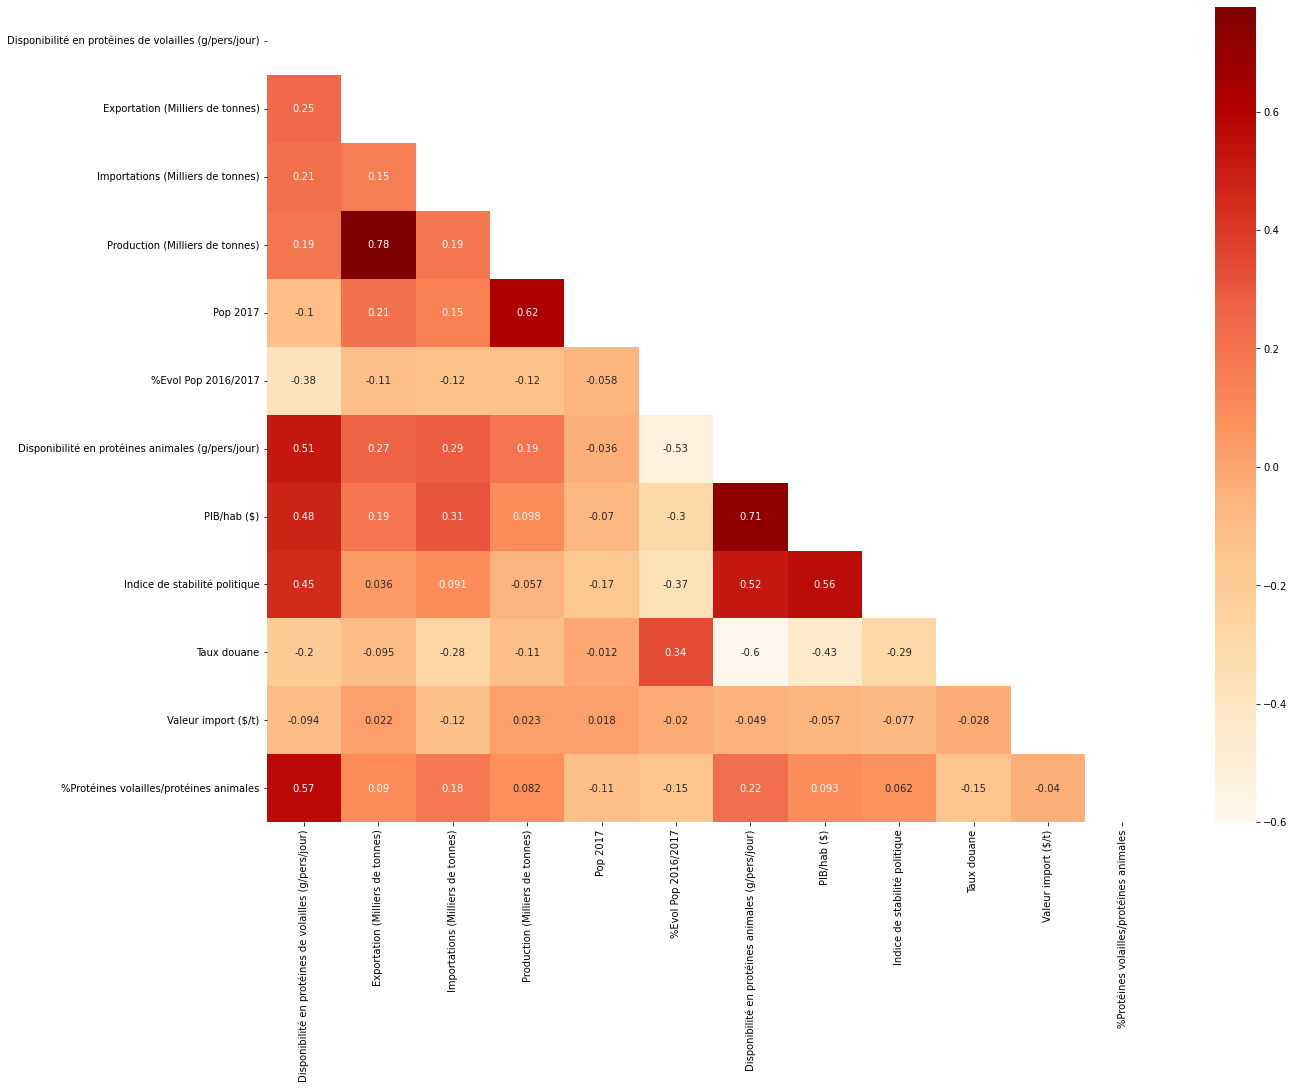

In [110]:
# Calculate pairwise-correlation
matrix = df.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=np.bool))
plt.figure(figsize=(20, 15))
sns.heatmap(matrix, mask=mask, annot=True, cmap='OrRd')
plt.show()

In [111]:
df.to_csv('bdd_la_poule_qui_chante.csv', index=False)

In [114]:
df['Pays'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bangladesh',
       'Belgique', 'Belize', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chypre', 'Colombie', 'Congo',
       'Costa Rica', 'Croatie', "Côte d'Ivoire", 'Danemark', 'Dominique',
       'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fidji',
       'Finlande', 'France', 'Fédération de Russie', 'Gabon', 'Gambie',
       'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée', 'Guyana',
       'Géorgie', 'Honduras', 'Hongrie', 'Inde', 'Indonésie',
       "Iran (République islamique d')", 'Irlande', 'Israël', 'Italie',
       'Jamaïque', 'Japon', 'Jordanie', 'Kazak